Vazy: síla a deformace

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from input import *

In [35]:
def ligament_force(lig0, lig_length, k1lig, k2lig):
    # lig = lig2 - lig1
    # lig_length = np.linalg.norm(lig)
    lig_length0 = lig0
    dlig_length = lig_length - lig_length0
    # nlig = lig / lig_length

    # if ligament == 'linear':
    #     if lig0 < lig_length:
    #         # F_lig = - k2lig * dlig_length * nlig
    #         F_lig = - k2lig * dlig_length
    #     else:
    #         F_lig = np.array([0, 0, 0])

    eps = dlig_length / lig0
    if (eps >= 0) and (eps <= 2 * epsL):
        # F_lig = - k1lig * (dlig_length ** 2) * nlig
        F_lig = - k2lig * (dlig_length ** 2)

    elif eps > 2 * epsL:
        # F_lig = - k2lig * (lig_length - (1 + epsL) * lig_length0) * nlig
        F_lig = - k1lig * (lig_length - (1 + epsL) * lig_length0)

    else:
        F_lig = np.array([0, 0, 0])

    F_lig_length = np.linalg.norm(F_lig)
    # ligament_value = [F_lig, lig1, lig2, name1, name2, lig0, lig_length]
    ligament_value = [F_lig_length, dlig_length, eps]
    return ligament_value

In [36]:
ACLat = np.array(tibia.points[538])
ACLpt = np.array(tibia.points[1001])

PCLat = np.array(tibia.points[1000])
PCLpt = np.array(tibia.points[189])

LCLt = np.array([55, 20, -40])

MCLat = np.array(tibia.points[1272])
MCLot = np.array(tibia.points[1206])
MCLdt = np.array(tibia.points[718])

ACLa0 = np.linalg.norm(ACLat - ACLaf0) / 1.00
ACLp0 = np.linalg.norm(ACLpt - ACLpf0) / 1.051

PCLa0 = np.linalg.norm(PCLat - PCLaf0) / 1.004
PCLp0 = np.linalg.norm(PCLpt - PCLpf0) / 1.05

LCL0 = np.linalg.norm(LCLt - LCLf0) / 1.05

MCLa0 = np.linalg.norm(MCLat - MCLaf0) / 0.94
MCLo0 = np.linalg.norm(MCLot - MCLof0) / 1.031
MCLd0 = np.linalg.norm(MCLdt - MCLdf0) / 1.049

In [67]:
ligament = ['ACLa', 'ACLp', 'PCLa', 'PCLp', 'LCL', 'MCLa', 'MCLo', 'MCLd']
length0 = [ACLa0, ACLp0, PCLa0, PCLp0, LCL0, MCLa0, MCLo0, MCLd0]
k1 = [k1ACLa, k1ACLp, k1PCLa, k1PCLp, k1LCL, k1MCLa, k1MCLo, k1MCLd]
k2 = [k2ACLa, k2ACLp, k2PCLa, k2PCLp, k2LCL, k2MCLa, k2MCLo, k2MCLd]

ligament_values = np.empty([100, np.shape(ligament)[0], 3])
# print(np.shape(ligament_values))

for j in range(np.shape(ligament)[0]):
    for i in range(100):
        ligament_value = np.array(ligament_force(length0[j], length0[j]*(i*0.001+0.998), k1[j], k2[j]))
        ligament_values[i, j, :] = ligament_value


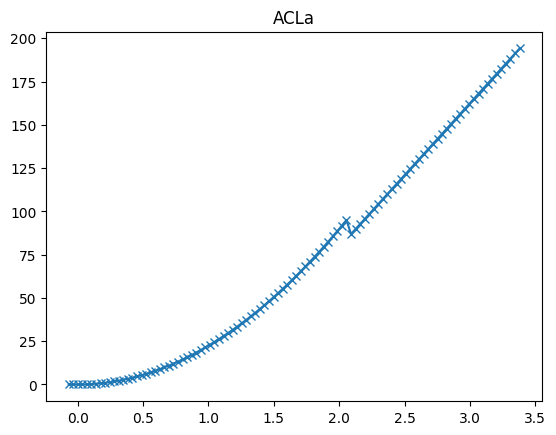

In [68]:
plt.title('ACLa')
plt.plot(ligament_values[:,0, 1], ligament_values[:, 0, 0], 'x-')

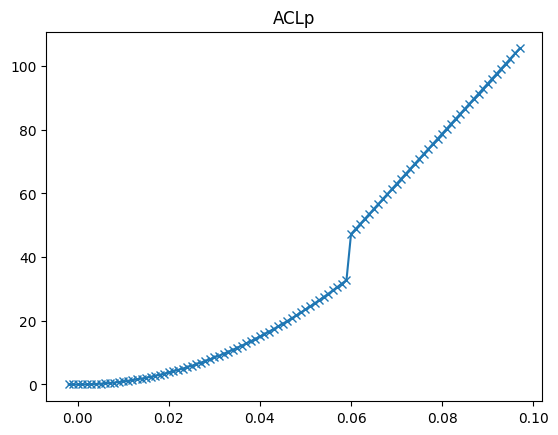

In [69]:
plt.title('ACLp')
plt.plot(ligament_values[:,1, 2], ligament_values[:, 1, 0], 'x-')

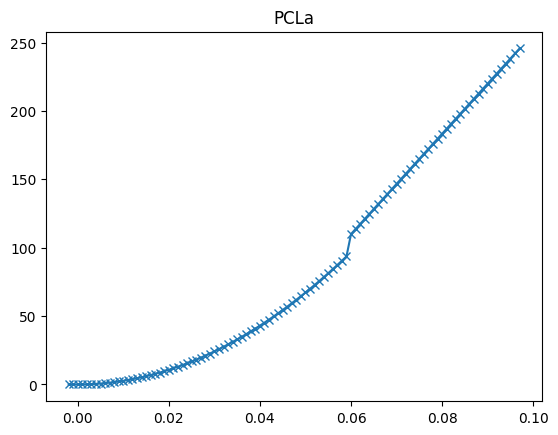

In [70]:
plt.title('PCLa')
plt.plot(ligament_values[:,2, 2], ligament_values[:, 2, 0], 'x-')

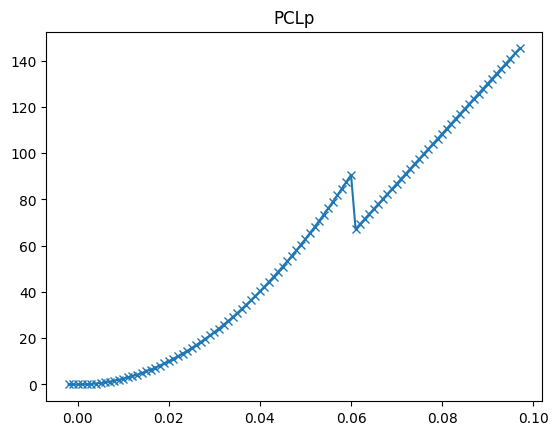

In [71]:
plt.title('PCLp')
plt.plot(ligament_values[:,3, 2], ligament_values[:, 3, 0], 'x-')

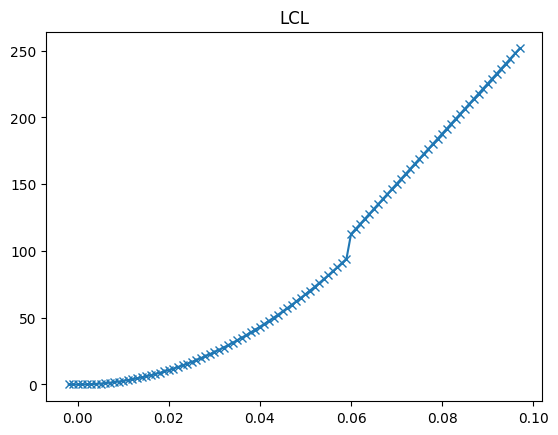

In [72]:
plt.title('LCL')
plt.plot(ligament_values[:,4, 2], ligament_values[:, 4, 0], 'x-')

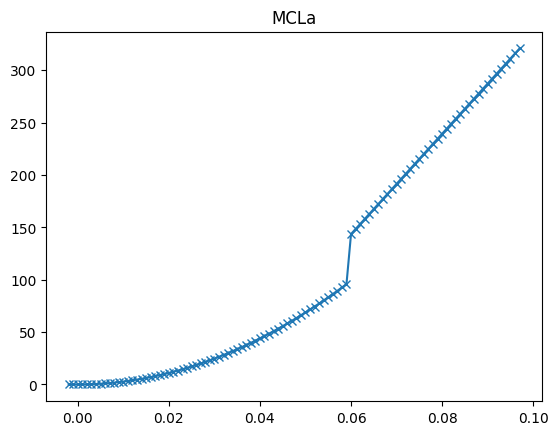

In [73]:
plt.title('MCLa')
plt.plot(ligament_values[:,5, 2], ligament_values[:, 5, 0], 'x-')

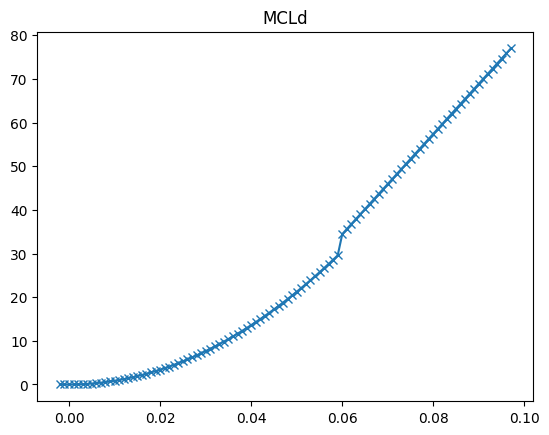

In [74]:
plt.title('MCLd')
plt.plot(ligament_values[:,6, 2], ligament_values[:, 6, 0], 'x-')

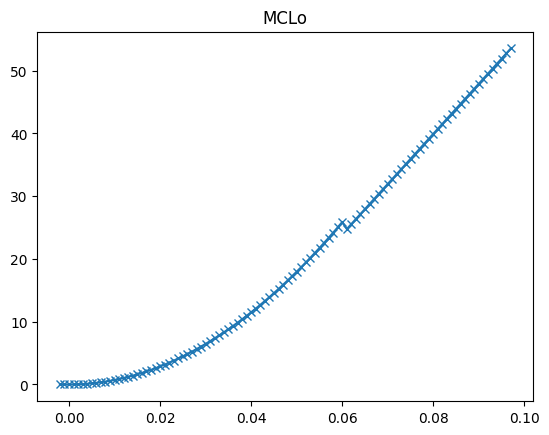

In [75]:
plt.title('MCLo')
plt.plot(ligament_values[:,7, 2], ligament_values[:, 7, 0], 'x-')